# MSc Thesis - Hugo Stam

### Example 02 - Offshore Port System - Barges

<img src="Figures/system_layout_alternative_2B.png" style="width:1000px">

In [1]:
# packages for data handling
import numpy as np
import pandas as pd
import statistics as st

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
# %matplotlib inline
%matplotlib notebook

import seaborn as sns
sns.set(style="ticks")

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# OpenTISim package
from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_offshore_storage

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets
from IPython.display import HTML

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# iPython Widgests
life_cycle = widgets.IntSlider(value=20, min=10, max=30, step=5, description='Life cycle:')
annual_demand = widgets.IntSlider(value=1000000, min=500000, max=2000000, step=500000, description='Demand:')
offshore_onshore_distance = widgets.IntSlider(value=40, min=20, max=60, step=20, description='Distance:')

container_ship = widgets.Dropdown(options=[('Post Panamax I (6,000 TEU)', 6000),
                                           ('New-Panamax (12,500 TEU)', 12500),
                                           ('ULCS (21,000 TEU)', 21000)], 
                                  value=12500, description='OGV:')

barge = widgets.Dropdown(options=[('Small (200 TEU)', 200), 
                                  ('Medium (250 TEU)', 250),
                                  ('Large (300 TEU)', 300)], 
                         value=250, description='Barge:')

foreshore_slope = widgets.Dropdown(options=[('Gently (3 km/m)', 3.0), 
                                            ('Average (2 km/m)', 2.0),
                                            ('Steep (1 km/m)', 1.0)], 
                                   value=2.0, description='Slope:')

print('\033[1m*** Input Values \033[0m')
display(annual_demand, offshore_onshore_distance, container_ship, barge, 
        foreshore_slope, life_cycle)

*** Input Values 


IntSlider(value=1000000, description='Demand:', max=2000000, min=500000, step=500000)

IntSlider(value=40, description='Distance:', max=60, min=20, step=20)

Dropdown(description='OGV:', index=1, options=(('Post Panamax I (6,000 TEU)', 6000), ('New-Panamax (12,500 TEU…

Dropdown(description='Barge:', index=1, options=(('Small (200 TEU)', 200), ('Medium (250 TEU)', 250), ('Large …

Dropdown(description='Slope:', index=1, options=(('Gently (3 km/m)', 3.0), ('Average (2 km/m)', 2.0), ('Steep …

IntSlider(value=20, description='Life cycle:', max=30, min=10, step=5)

### How to run?
#### Go to the tab 'Cell'
##### Click on "Run all below"

In [3]:
scroll_to_current_cell(preserve=True)

In [4]:
offshore_distance = offshore_onshore_distance.value
demand = annual_demand.value
design_container_ship = container_ship.value
design_barge = barge.value
slope = foreshore_slope.value
lifecycle = life_cycle.value

demand = 2_100_000
avg_parcel = design_container_ship / 8
startyear = 2020

In [5]:
container = demand  # TEU
years = list(range(startyear, startyear+lifecycle+1))

trend_1 = []
trend_2 = []
trend_3 = []

for i in range(lifecycle-4):
    trend_1.append(container +   500_000/15 * i)
    trend_2.append(container + 1_000_000/15 * i)
    trend_3.append(container + 1_500_000/15 * i)

demand_0 = []
demand_1 = []
demand_2 = []
demand_3 = []

for year in years:
    if year < 2025:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.00))
        demand_2.append(int(container * 1.00))
        demand_3.append(int(container * 1.00))
        
    elif year < 2030:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.17))
        demand_2.append(int(container * 1.33))
        demand_3.append(int(container * 1.50))
    elif year < 2035:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.33))
        demand_2.append(int(container * 1.67))
        demand_3.append(int(container * 2.00))
    else:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.50))
        demand_2.append(int(container * 2.00))
        demand_3.append(int(container * 2.50))

In [6]:
if lifecycle == 20:
    years = years[0:20]
    demand_0 = demand_0[0:20]
    demand_1 = demand_1[0:20]
    demand_2 = demand_2[0:20]
    demand_3 = demand_3[0:20]
    
if lifecycle == 10:
    years = years[0:10]
    demand_0 = demand_0[0:10]
    demand_1 = demand_1[0:10]
    demand_2 = demand_2[0:10]
    demand_3 = demand_3[0:10]

In [7]:
years = list(range(startyear, startyear + lifecycle))
       
scenario_demand = demand_0
scenario_data={'year': years, 'volume': scenario_demand}

In [8]:
# instantiate Commodity objects, the inputs for the Commodity class
if design_container_ship == 6000:
    container_defaults.container_data['post_panamax_I_perc'] = 100
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 0

if design_container_ship == 12500:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 100
    container_defaults.container_data['ULCS_perc'] = 0
    
if design_container_ship == 21000:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 100
    
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]

In [9]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

In [10]:
OffshoreBarge = container_offshore_storage.System(
                startyear = startyear,
                lifecycle = lifecycle,
                stack_equipment = 'rtg',
                laden_stack = 'rtg',
                elements = demand + vessels,
                crane_type_defaults = container_defaults.sts_crane_data,
                offshore_distance = offshore_distance,
                onshore_perc = 1.0, 
                barge_type = 'medium',
                foreshore_slope = slope,
                bathymetry_factor = 0.75,
                allowable_berth_occupancy = 0.70,
                offshore_dwell_time = 2.0,
                laden_perc = 0.80, 
                reefer_perc = 0.10,
                empty_perc = 0.075, 
                oog_perc = 0.025,
                transhipment_ratio = 0.0,
                debug = True)

# Start simulation

In [11]:
scroll_to_current_cell(preserve=True)
OffshoreBarge.simulate()


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 1344
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 1344
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 2100000

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

 >> nr of OGV berths: 1
     >> max vessel length: 366
     >> quay length 396 m
     >> quay depth 19 m
  *** add Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 7.01
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 1
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 3.972
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 1
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 2.959
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 2.492
     Berth occupancy online  (after adding Berth): inf

 >> nr of OGV berths: 2
     >> max vessel length: 366
     >> quay length 853 m
     >> quay depth 19 m
  *** add Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Berth occupancy planned (after adding Quay): 2.492
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 1.986
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 2
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 1.682
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 2
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 1.479
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.324
     Berth occupancy online  (after adding Berth): inf

 >> nr of OGV berths: 3
     >> max vessel length: 366
     >> quay length 1,272 m
     >> quay depth 19 m
  *** add Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Berth occupancy planned (after adding Quay): 1.324
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 1.179
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 3
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 1.071
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 3
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 0.986
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.908
     Berth occupancy online  (after adding Berth): inf

 >> nr of OGV berths: 4
     >> max vessel length: 366
     >> quay length 1,691 m
     >> quay depth 19 m
  *** add Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Berth occupancy planned (after adding Quay): 0.908
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 0.841
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 4
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 0.786
     Berth occupancy online  (after adding Crane): inf

 >> nr of OGV berths: 4
  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 0.74
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.693
     Berth occupancy online  (after adding Berth): inf

 >> nr of OGV berths: 5
     >> max vessel length: 366
     >> quay length 2,110 m
     >> quay depth 19 m
  *** add Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Berth occupancy planned (after adding Quay): 0.693
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,687500.0
3,2023,687500.0
4,2024,687500.0


     Berth occupancy planned (after adding Crane): 0.654
     Berth occupancy online  (after adding Crane): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 13
     Horizontal Transport online  (@ start of year): 0
     Horizontal Transport planned (@ start of year): 0
  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


     Stack Capacity planned  (@ start of year): 0
     Stack Capacity online   (@ start of year): 0
     Stack Capacity required (@ start of year): 18078
     Laden and Reefer Ground Slots required (@ start of year): 3616

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


     Empty Stack capacity planned  (@ start of year): 0
     Empty Stack capacity online   (@ start of year): 0
     Empty Stack capacity required (@ start of year): 1500
     Empty Ground Slots required   (@ start of year): 250

  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,1493800.0,0.0
2,2022,0.0,73440.0,0.0,146880.0
3,2023,0.0,73440.0,0.0,146880.0
4,2024,0.0,73440.0,0.0,146880.0


  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,1493800.0,0.0
2,2022,0.0,73440.0,0.0,146880.0
3,2023,0.0,73440.0,0.0,146880.0
4,2024,0.0,73440.0,0.0,146880.0


  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,1493800.0,0.0
2,2022,0.0,73440.0,0.0,146880.0
3,2023,0.0,73440.0,0.0,146880.0
4,2024,0.0,73440.0,0.0,146880.0


  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,1493800.0,0.0
2,2022,0.0,73440.0,0.0,146880.0
3,2023,0.0,73440.0,0.0,146880.0
4,2024,0.0,73440.0,0.0,146880.0


     OOG Slots planned  (@ start of year): 0
     OOG Slots online   (@ start of year): 0
     OOG Slots required (@ start of year): 251

  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,3385000.0,0.0
2,2022,0.0,168000.0,0.0,336000.0
3,2023,0.0,168000.0,0.0,336000.0
4,2024,0.0,168000.0,0.0,336000.0


  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,3385000.0,0.0
2,2022,0.0,168000.0,0.0,336000.0
3,2023,0.0,168000.0,0.0,336000.0
4,2024,0.0,168000.0,0.0,336000.0


  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,3385000.0,0.0
2,2022,0.0,168000.0,0.0,336000.0
3,2023,0.0,168000.0,0.0,336000.0
4,2024,0.0,168000.0,0.0,336000.0


     Total Ground Slots required   (@ start of year):  3,866
     Total Stack capacity required (@ start of year):  19,800 TEU
     Total Stack capacity online   (@ start of year):  0 TEU

     Number of stack Equipment online (@ start of year): 0

     Empty handlers planned (@ start of year): 0
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0



     Offshore barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): inf

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 1
  >> nr of offshore barge quays:  0
offshore_barge_quay_length 130 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 20.151

  >> nr of offshore barge cranes: 0
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 1
     Offshore barge berth capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 2
     Offshore barge berth capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 2
  >> nr of offshore barge quays:  1
offshore_barge_quay_length 268 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 229270.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 10.076

  >> nr of offshore barge cranes: 2
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 3
     Offshore barge berth capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 3
  >> nr of offshore barge quays:  2
offshore_barge_quay_length 394 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 343900.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 6.717

  >> nr of offshore barge cranes: 3
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 4
     Offshore barge berth capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 4
  >> nr of offshore barge quays:  3
offshore_barge_quay_length 521 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 458540.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 5.038

  >> nr of offshore barge cranes: 4
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 5
     Offshore barge berth capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 6
     Offshore barge berth capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 5
  >> nr of offshore barge quays:  4
offshore_barge_quay_length 647 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 573170.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 4.03

  >> nr of offshore barge cranes: 6
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 7
     Offshore barge berth capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 6
  >> nr of offshore barge quays:  5
offshore_barge_quay_length 774 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 687800.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 3.359

  >> nr of offshore barge cranes: 7
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 8
     Offshore barge berth capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 7
  >> nr of offshore barge quays:  6
offshore_barge_quay_length 900 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 802440.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.879

  >> nr of offshore barge cranes: 8
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 9
     Offshore barge berth capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 10
     Offshore barge berth capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 917070.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 8
  >> nr of offshore barge quays:  7
offshore_barge_quay_length 1,027 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 917070.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.519

  >> nr of offshore barge cranes: 10
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 11
     Offshore barge berth capacity planned (after adding Crane): 917070.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1031700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 9
  >> nr of offshore barge quays:  8
offshore_barge_quay_length 1,153 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1031700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.239

  >> nr of offshore barge cranes: 11
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 12
     Offshore barge berth capacity planned (after adding Crane): 1031700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1146340.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 10
  >> nr of offshore barge quays:  9
offshore_barge_quay_length 1,280 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1146340.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.015

  >> nr of offshore barge cranes: 12
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 13
     Offshore barge berth capacity planned (after adding Crane): 1146340.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 11
  >> nr of offshore barge quays:  10
offshore_barge_quay_length 1,406 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.832

  >> nr of offshore barge cranes: 13
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 14
     Offshore barge berth capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 15
     Offshore barge berth capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 12
  >> nr of offshore barge quays:  11
offshore_barge_quay_length 1,533 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.679

  >> nr of offshore barge cranes: 15
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 16
     Offshore barge berth capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1490240.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 13
  >> nr of offshore barge quays:  12
offshore_barge_quay_length 1,659 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1490240.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.55

  >> nr of offshore barge cranes: 16
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 17
     Offshore barge berth capacity planned (after adding Crane): 1490240.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 14
  >> nr of offshore barge quays:  13
offshore_barge_quay_length 1,786 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.439

  >> nr of offshore barge cranes: 17
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 18
     Offshore barge berth capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 19
     Offshore barge berth capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1719510.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 15
  >> nr of offshore barge quays:  14
offshore_barge_quay_length 1,912 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1719510.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.343

  >> nr of offshore barge cranes: 19
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 20
     Offshore barge berth capacity planned (after adding Crane): 1719510.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1834140.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 16
  >> nr of offshore barge quays:  15
offshore_barge_quay_length 2,039 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1834140.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.259

  >> nr of offshore barge cranes: 20
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 21
     Offshore barge berth capacity planned (after adding Crane): 1834140.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 17
  >> nr of offshore barge quays:  16
offshore_barge_quay_length 2,165 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.185

  >> nr of offshore barge cranes: 21
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 22
     Offshore barge berth capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 23
     Offshore barge berth capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 18
  >> nr of offshore barge quays:  17
offshore_barge_quay_length 2,292 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.12

  >> nr of offshore barge cranes: 23
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 24
     Offshore barge berth capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 19
  >> nr of offshore barge quays:  18
offshore_barge_quay_length 2,418 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.061

  >> nr of offshore barge cranes: 24
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 25
     Offshore barge berth capacity planned (after adding Crane): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2292680.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 20
  >> nr of offshore barge quays:  19
offshore_barge_quay_length 2,545 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 2292680.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.008

  >> nr of offshore barge cranes: 25
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 26
     Offshore barge berth capacity planned (after adding Crane): 2292680.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 21
  >> nr of offshore barge quays:  20
offshore_barge_quay_length 2,671 m
offshore_barge_quay_depth  20 m
  *** add Offshore Barge Quay to elements


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96

  >> nr of offshore barge cranes: 26
  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 27
     Offshore barge berth capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Labour
0,2020,0.0
1,2021,0.0
2,2022,187500.0
3,2023,187500.0
4,2024,187500.0


  >> nr of offshore barge cranes: 28
     Offshore barge berth capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 51.5 ha
>>> Total onshore land use 34.1 ha
length 366
draught 15.2
beam 49.0
  *** add Access Channel to elements
channel_width 480 m
channel_depth 17 m
channel_length 0 m
channel_volume 0 m3
turning_circle_diameter 658 m3
turning_circle_volume 0 m3
berth_pocket_width 98 m
berth_pocket_volume 0 m3
dredging_volume 0 m3

channel_length_max 35,400 m
excavation_depth 0 m


,Year
0,2020
1,2021
2,2022
3,2023
4,2024



>>> Total offshore land use 51.5 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 515337.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 515,000 m2
     >> reclamation volume 10,307,000 m3

     >> reclamation area required 515337.0000000001
     >> reclamation volume required 10,307,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,219298230.0,0.0
1,2021,0.0,904639.8
2,2022,0.0,904639.8
3,2023,0.0,904639.8
4,2024,0.0,904639.8



>>> Total offshore land use 51.5 ha

>>> Total offshore land use 51.5 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 718.0 ha

  *** add Revetment to elements

     >> revetment_length 720 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,129216557.0,0.0
1,2021,0.0,1292165.0
2,2022,0.0,1292165.0
3,2023,0.0,1292165.0
4,2024,0.0,1292165.0



>>> Total offshore land use 51.5 ha

     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 0
nr barges required: 36
     Barge Capacity planned  (@ start of year): 0
     Barge Capacity online   (@ start of year): 0
     Barge Capacity required (@ start of year): 2100000

  *** add Barge to elements
barge opex 542933 USD


,Year,Barge Operations,Barge Labour
0,2020,0.000000,0.0
1,2021,0.000000,0.0
2,2022,317933.657674,225000.0
3,2023,317933.657674,225000.0
4,2024,317933.657674,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 1
nr barges required: 36
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 2
nr barges required: 36
  *** add Barge to elements
barge opex 942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,8000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,400000.0,225000.0
3,2023,0.0,317933.657674,400000.0,225000.0
4,2024,0.0,317933.657674,400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 3
nr barges required: 36
  *** add Barge to elements
barge opex 1142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,12000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,600000.0,225000.0
3,2023,0.0,317933.657674,600000.0,225000.0
4,2024,0.0,317933.657674,600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 4
nr barges required: 36
  *** add Barge to elements
barge opex 1342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,16000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,800000.0,225000.0
3,2023,0.0,317933.657674,800000.0,225000.0
4,2024,0.0,317933.657674,800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 5
nr barges required: 36
  *** add Barge to elements
barge opex 1542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,20000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,1000000.0,225000.0
3,2023,0.0,317933.657674,1000000.0,225000.0
4,2024,0.0,317933.657674,1000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 6
nr barges required: 36
  *** add Barge to elements
barge opex 1742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,24000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,1200000.0,225000.0
3,2023,0.0,317933.657674,1200000.0,225000.0
4,2024,0.0,317933.657674,1200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 7
nr barges required: 36
  *** add Barge to elements
barge opex 1942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,28000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,1400000.0,225000.0
3,2023,0.0,317933.657674,1400000.0,225000.0
4,2024,0.0,317933.657674,1400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 8
nr barges required: 36
  *** add Barge to elements
barge opex 2142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,32000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,1600000.0,225000.0
3,2023,0.0,317933.657674,1600000.0,225000.0
4,2024,0.0,317933.657674,1600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 9
nr barges required: 36
  *** add Barge to elements
barge opex 2342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,36000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,1800000.0,225000.0
3,2023,0.0,317933.657674,1800000.0,225000.0
4,2024,0.0,317933.657674,1800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 10
nr barges required: 36
  *** add Barge to elements
barge opex 2542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,40000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,2000000.0,225000.0
3,2023,0.0,317933.657674,2000000.0,225000.0
4,2024,0.0,317933.657674,2000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 11
nr barges required: 36
  *** add Barge to elements
barge opex 2742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,44000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,2200000.0,225000.0
3,2023,0.0,317933.657674,2200000.0,225000.0
4,2024,0.0,317933.657674,2200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 12
nr barges required: 36
  *** add Barge to elements
barge opex 2942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,48000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,2400000.0,225000.0
3,2023,0.0,317933.657674,2400000.0,225000.0
4,2024,0.0,317933.657674,2400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 13
nr barges required: 36
  *** add Barge to elements
barge opex 3142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,52000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,2600000.0,225000.0
3,2023,0.0,317933.657674,2600000.0,225000.0
4,2024,0.0,317933.657674,2600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 14
nr barges required: 36
  *** add Barge to elements
barge opex 3342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,56000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,2800000.0,225000.0
3,2023,0.0,317933.657674,2800000.0,225000.0
4,2024,0.0,317933.657674,2800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 15
nr barges required: 36
  *** add Barge to elements
barge opex 3542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,60000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,3000000.0,225000.0
3,2023,0.0,317933.657674,3000000.0,225000.0
4,2024,0.0,317933.657674,3000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 16
nr barges required: 36
  *** add Barge to elements
barge opex 3742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,64000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,3200000.0,225000.0
3,2023,0.0,317933.657674,3200000.0,225000.0
4,2024,0.0,317933.657674,3200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 17
nr barges required: 36
  *** add Barge to elements
barge opex 3942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,68000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,3400000.0,225000.0
3,2023,0.0,317933.657674,3400000.0,225000.0
4,2024,0.0,317933.657674,3400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 18
nr barges required: 36
  *** add Barge to elements
barge opex 4142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,72000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,3600000.0,225000.0
3,2023,0.0,317933.657674,3600000.0,225000.0
4,2024,0.0,317933.657674,3600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 19
nr barges required: 36
  *** add Barge to elements
barge opex 4342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,76000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,3800000.0,225000.0
3,2023,0.0,317933.657674,3800000.0,225000.0
4,2024,0.0,317933.657674,3800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 20
nr barges required: 36
  *** add Barge to elements
barge opex 4542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,80000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,4000000.0,225000.0
3,2023,0.0,317933.657674,4000000.0,225000.0
4,2024,0.0,317933.657674,4000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 21
nr barges required: 36
  *** add Barge to elements
barge opex 4742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,84000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,4200000.0,225000.0
3,2023,0.0,317933.657674,4200000.0,225000.0
4,2024,0.0,317933.657674,4200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 22
nr barges required: 36
  *** add Barge to elements
barge opex 4942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,88000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,4400000.0,225000.0
3,2023,0.0,317933.657674,4400000.0,225000.0
4,2024,0.0,317933.657674,4400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 23
nr barges required: 36
  *** add Barge to elements
barge opex 5142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,92000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,4600000.0,225000.0
3,2023,0.0,317933.657674,4600000.0,225000.0
4,2024,0.0,317933.657674,4600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 24
nr barges required: 36
  *** add Barge to elements
barge opex 5342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,96000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,4800000.0,225000.0
3,2023,0.0,317933.657674,4800000.0,225000.0
4,2024,0.0,317933.657674,4800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 25
nr barges required: 36
  *** add Barge to elements
barge opex 5542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,100000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,5000000.0,225000.0
3,2023,0.0,317933.657674,5000000.0,225000.0
4,2024,0.0,317933.657674,5000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 26
nr barges required: 36
  *** add Barge to elements
barge opex 5742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,104000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,5200000.0,225000.0
3,2023,0.0,317933.657674,5200000.0,225000.0
4,2024,0.0,317933.657674,5200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 27
nr barges required: 36
  *** add Barge to elements
barge opex 5942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,108000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,5400000.0,225000.0
3,2023,0.0,317933.657674,5400000.0,225000.0
4,2024,0.0,317933.657674,5400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 28
nr barges required: 36
  *** add Barge to elements
barge opex 6142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,112000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,5600000.0,225000.0
3,2023,0.0,317933.657674,5600000.0,225000.0
4,2024,0.0,317933.657674,5600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 29
nr barges required: 36
  *** add Barge to elements
barge opex 6342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,116000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,5800000.0,225000.0
3,2023,0.0,317933.657674,5800000.0,225000.0
4,2024,0.0,317933.657674,5800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 30
nr barges required: 36
  *** add Barge to elements
barge opex 6542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,120000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,6000000.0,225000.0
3,2023,0.0,317933.657674,6000000.0,225000.0
4,2024,0.0,317933.657674,6000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 31
nr barges required: 36
  *** add Barge to elements
barge opex 6742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,124000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,6200000.0,225000.0
3,2023,0.0,317933.657674,6200000.0,225000.0
4,2024,0.0,317933.657674,6200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 32
nr barges required: 36
  *** add Barge to elements
barge opex 6942933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,128000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,6400000.0,225000.0
3,2023,0.0,317933.657674,6400000.0,225000.0
4,2024,0.0,317933.657674,6400000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 33
nr barges required: 36
  *** add Barge to elements
barge opex 7142933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,132000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,6600000.0,225000.0
3,2023,0.0,317933.657674,6600000.0,225000.0
4,2024,0.0,317933.657674,6600000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 34
nr barges required: 36
  *** add Barge to elements
barge opex 7342933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,136000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,6800000.0,225000.0
3,2023,0.0,317933.657674,6800000.0,225000.0
4,2024,0.0,317933.657674,6800000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 35
nr barges required: 36
  *** add Barge to elements
barge opex 7542933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,140000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,7000000.0,225000.0
3,2023,0.0,317933.657674,7000000.0,225000.0
4,2024,0.0,317933.657674,7000000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 36
nr barges required: 36
  *** add Barge Channel to elements

Calibration Barge Channel
barge_channel_width 127 m
barge_channel_depth 7 m
barge_channel_length 14,000 m
barge_channel_volume 6,242,600 m3
barge_turning_circle_diameter 180 m
barge_turning_circle_volume 178,128 m3
barge_berth_pocket_width 2

,Year,Capital Dredging,Maintenance Dredging
0,2020,41745939.0,0.000000e+00
1,2021,41745939.0,0.000000e+00
2,2022,0.0,3.005708e+06
3,2023,0.0,3.005708e+06
4,2024,0.0,3.005708e+06



     Onshore barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): inf [-]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 1
  >> nr of onshore barge quays: 0
onshore_barge_quay_length 130 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4804044.0,0.0,0.0
1,2021,3202696.0,0.0,0.0
2,2022,0.0,61942.4,61942.4
3,2023,0.0,61942.4,61942.4
4,2024,0.0,61942.4,61942.4


     Onshore barge berth capacity planned     (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 20.151 [-]

  >> nr of onshore barge cranes: 0
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 1
     Onshore barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 2
     Onshore barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 2
  >> nr of onshore barge quays: 1
onshore_barge_quay_length 268 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,9266798.4,0.00,0.00
1,2021,6177865.6,0.00,0.00
2,2022,0.0,127696.64,127696.64
3,2023,0.0,127696.64,127696.64
4,2024,0.0,127696.64,127696.64


     Onshore barge berth capacity planned     (@ start of year): 229267.584 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 10.076 [-]

  >> nr of onshore barge cranes: 2
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 3
     Onshore barge crane capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 3
  >> nr of onshore barge quays: 2
onshore_barge_quay_length 394 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,13357656.6,0.00,0.00
1,2021,8905104.4,0.00,0.00
2,2022,0.0,187971.36,187971.36
3,2023,0.0,187971.36,187971.36
4,2024,0.0,187971.36,187971.36


     Onshore barge berth capacity planned     (@ start of year): 343901.376 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 6.717 [-]

  >> nr of onshore barge cranes: 3
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 4
     Onshore barge crane capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 4
  >> nr of onshore barge quays: 3
onshore_barge_quay_length 521 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,17448514.8,0.00,0.00
1,2021,11632343.2,0.00,0.00
2,2022,0.0,248246.08,248246.08
3,2023,0.0,248246.08,248246.08
4,2024,0.0,248246.08,248246.08


     Onshore barge berth capacity planned     (@ start of year): 458535.168 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 5.038 [-]

  >> nr of onshore barge cranes: 4
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 5
     Onshore barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 6
     Onshore barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 5
  >> nr of onshore barge quays: 4
onshore_barge_quay_length 647 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,21539373.0,0.0,0.0
1,2021,14359582.0,0.0,0.0
2,2022,0.0,308520.8,308520.8
3,2023,0.0,308520.8,308520.8
4,2024,0.0,308520.8,308520.8


     Onshore barge berth capacity planned     (@ start of year): 573168.96 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 4.03 [-]

  >> nr of onshore barge cranes: 6
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 7
     Onshore barge crane capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 6
  >> nr of onshore barge quays: 5
onshore_barge_quay_length 774 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,25630231.2,0.00,0.00
1,2021,17086820.8,0.00,0.00
2,2022,0.0,368795.52,368795.52
3,2023,0.0,368795.52,368795.52
4,2024,0.0,368795.52,368795.52


     Onshore barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 3.359 [-]

  >> nr of onshore barge cranes: 7
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 8
     Onshore barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 7
  >> nr of onshore barge quays: 6
onshore_barge_quay_length 900 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,29721089.4,0.00,0.00
1,2021,19814059.6,0.00,0.00
2,2022,0.0,429070.24,429070.24
3,2023,0.0,429070.24,429070.24
4,2024,0.0,429070.24,429070.24


     Onshore barge berth capacity planned     (@ start of year): 802436.544 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.879 [-]

  >> nr of onshore barge cranes: 8
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 9
     Onshore barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 10
     Onshore barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 917070.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 8
  >> nr of onshore barge quays: 7
onshore_barge_quay_length 1,027 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,33811947.6,0.00,0.00
1,2021,22541298.4,0.00,0.00
2,2022,0.0,489344.96,489344.96
3,2023,0.0,489344.96,489344.96
4,2024,0.0,489344.96,489344.96


     Onshore barge berth capacity planned     (@ start of year): 917070.336 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.519 [-]

  >> nr of onshore barge cranes: 10
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 11
     Onshore barge crane capacity planned (after adding Crane): 917070.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1031700.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 9
  >> nr of onshore barge quays: 8
onshore_barge_quay_length 1,153 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,37962349.2,0.00,0.00
1,2021,25308232.8,0.00,0.00
2,2022,0.0,549619.68,549619.68
3,2023,0.0,549619.68,549619.68
4,2024,0.0,549619.68,549619.68


     Onshore barge berth capacity planned     (@ start of year): 1031704.128 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.239 [-]

  >> nr of onshore barge cranes: 11
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 12
     Onshore barge crane capacity planned (after adding Crane): 1031700.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1146340.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 10
  >> nr of onshore barge quays: 9
onshore_barge_quay_length 1,280 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,42125536.8,0.0,0.0
1,2021,28083691.2,0.0,0.0
2,2022,0.0,609894.4,609894.4
3,2023,0.0,609894.4,609894.4
4,2024,0.0,609894.4,609894.4


     Onshore barge berth capacity planned     (@ start of year): 1146337.92 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.015 [-]

  >> nr of onshore barge cranes: 12
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 13
     Onshore barge crane capacity planned (after adding Crane): 1146340.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1260970.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 11
  >> nr of onshore barge quays: 10
onshore_barge_quay_length 1,406 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,46288725.0,0.00,0.00
1,2021,30859150.0,0.00,0.00
2,2022,0.0,670169.12,670169.12
3,2023,0.0,670169.12,670169.12
4,2024,0.0,670169.12,670169.12


     Onshore barge berth capacity planned     (@ start of year): 1260971.712 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.832 [-]

  >> nr of onshore barge cranes: 13
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 14
     Onshore barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 15
     Onshore barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 12
  >> nr of onshore barge quays: 11
onshore_barge_quay_length 1,533 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,50451912.6,0.00,0.00
1,2021,33634608.4,0.00,0.00
2,2022,0.0,730443.84,730443.84
3,2023,0.0,730443.84,730443.84
4,2024,0.0,730443.84,730443.84


     Onshore barge berth capacity planned     (@ start of year): 1375605.504 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.679 [-]

  >> nr of onshore barge cranes: 15
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 16
     Onshore barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1490240.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 13
  >> nr of onshore barge quays: 12
onshore_barge_quay_length 1,659 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,54615100.8,0.00,0.00
1,2021,36410067.2,0.00,0.00
2,2022,0.0,790718.56,790718.56
3,2023,0.0,790718.56,790718.56
4,2024,0.0,790718.56,790718.56


     Onshore barge berth capacity planned     (@ start of year): 1490239.296 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.55 [-]

  >> nr of onshore barge cranes: 16
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 17
     Onshore barge crane capacity planned (after adding Crane): 1490240.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1604870.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 14
  >> nr of onshore barge quays: 13
onshore_barge_quay_length 1,786 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,58778288.4,0.00,0.00
1,2021,39185525.6,0.00,0.00
2,2022,0.0,850993.28,850993.28
3,2023,0.0,850993.28,850993.28
4,2024,0.0,850993.28,850993.28


     Onshore barge berth capacity planned     (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.439 [-]

  >> nr of onshore barge cranes: 17
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 18
     Onshore barge crane capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 19
     Onshore barge crane capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1719510.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 15
  >> nr of onshore barge quays: 14
onshore_barge_quay_length 1,912 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,62941476.6,0.0,0.0
1,2021,41960984.4,0.0,0.0
2,2022,0.0,911268.0,911268.0
3,2023,0.0,911268.0,911268.0
4,2024,0.0,911268.0,911268.0


     Onshore barge berth capacity planned     (@ start of year): 1719506.88 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.343 [-]

  >> nr of onshore barge cranes: 19
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 20
     Onshore barge crane capacity planned (after adding Crane): 1719510.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1834140.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 16
  >> nr of onshore barge quays: 15
onshore_barge_quay_length 2,039 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,67104664.2,0.00,0.00
1,2021,44736442.8,0.00,0.00
2,2022,0.0,971542.72,971542.72
3,2023,0.0,971542.72,971542.72
4,2024,0.0,971542.72,971542.72


     Onshore barge berth capacity planned     (@ start of year): 1834140.672 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.259 [-]

  >> nr of onshore barge cranes: 20
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 21
     Onshore barge crane capacity planned (after adding Crane): 1834140.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1948770.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 17
  >> nr of onshore barge quays: 16
onshore_barge_quay_length 2,165 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,71267851.8,0.00,0.00
1,2021,47511901.2,0.00,0.00
2,2022,0.0,1031817.44,1031817.44
3,2023,0.0,1031817.44,1031817.44
4,2024,0.0,1031817.44,1031817.44


     Onshore barge berth capacity planned     (@ start of year): 1948774.464 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.185 [-]

  >> nr of onshore barge cranes: 21
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 22
     Onshore barge crane capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 23
     Onshore barge crane capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 18
  >> nr of onshore barge quays: 17
onshore_barge_quay_length 2,292 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,75431040.0,0.00,0.00
1,2021,50287360.0,0.00,0.00
2,2022,0.0,1092092.16,1092092.16
3,2023,0.0,1092092.16,1092092.16
4,2024,0.0,1092092.16,1092092.16


     Onshore barge berth capacity planned     (@ start of year): 2063408.256 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of onshore barge cranes: 23
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 24
     Onshore barge crane capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2178040.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 19
  >> nr of onshore barge quays: 18
onshore_barge_quay_length 2,418 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,79594227.6,0.00,0.00
1,2021,53062818.4,0.00,0.00
2,2022,0.0,1152366.88,1152366.88
3,2023,0.0,1152366.88,1152366.88
4,2024,0.0,1152366.88,1152366.88


     Onshore barge berth capacity planned     (@ start of year): 2178042.048 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.061 [-]

  >> nr of onshore barge cranes: 24
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 25
     Onshore barge crane capacity planned (after adding Crane): 2178040.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2292680.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 20
  >> nr of onshore barge quays: 19
onshore_barge_quay_length 2,545 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,83757415.8,0.0,0.0
1,2021,55838277.2,0.0,0.0
2,2022,0.0,1212641.6,1212641.6
3,2023,0.0,1212641.6,1212641.6
4,2024,0.0,1212641.6,1212641.6


     Onshore barge berth capacity planned     (@ start of year): 2292675.84 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.008 [-]

  >> nr of onshore barge cranes: 25
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 26
     Onshore barge crane capacity planned (after adding Crane): 2292680.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2407310.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 21
  >> nr of onshore barge quays: 20
onshore_barge_quay_length 2,671 m
onshore_barge_quay_depth 9 m
  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,87920603.4,0.00,0.00
1,2021,58613735.6,0.00,0.00
2,2022,0.0,1272916.32,1272916.32
3,2023,0.0,1272916.32,1272916.32
4,2024,0.0,1272916.32,1272916.32


     Onshore barge berth capacity planned     (@ start of year): 2407309.632 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.96 [-]

  >> nr of onshore barge cranes: 26
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 27
     Onshore barge crane capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 28
     Onshore barge crane capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 0
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of year): 0
     Hinterland Gate service rate planned (@ start of year): inf

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 1
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 2
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 3
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 4
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 5
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 6
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 7
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 8
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 9
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 10

     Hinterland barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): inf [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 1
  >> nr of hinterland barge quays: 0
hinterland barge quay length 130 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4804044.0,0.0,0.0
1,2021,3202696.0,0.0,0.0
2,2022,0.0,61942.4,61942.4
3,2023,0.0,61942.4,61942.4
4,2024,0.0,61942.4,61942.4


     Hinterland barge berth capacity planned     (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 10.076 [-]

  >> nr of hinterland barge cranes: 0
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 1
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 2
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 2
  >> nr of hinterland barge quays: 1
hinterland barge quay length 268 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,9266798.4,0.00,0.00
1,2021,6177865.6,0.00,0.00
2,2022,0.0,127696.64,127696.64
3,2023,0.0,127696.64,127696.64
4,2024,0.0,127696.64,127696.64


     Hinterland barge berth capacity planned     (@ start of year): 229267.584 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 5.038 [-]

  >> nr of hinterland barge cranes: 2
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 3
     Hinterland barge crane capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 3
  >> nr of hinterland barge quays: 2
hinterland barge quay length 394 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,13357656.6,0.00,0.00
1,2021,8905104.4,0.00,0.00
2,2022,0.0,187971.36,187971.36
3,2023,0.0,187971.36,187971.36
4,2024,0.0,187971.36,187971.36


     Hinterland barge berth capacity planned     (@ start of year): 343901.376 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 3.359 [-]

  >> nr of hinterland barge cranes: 3
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 4
     Hinterland barge crane capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 4
  >> nr of hinterland barge quays: 3
hinterland barge quay length 521 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,17448514.8,0.00,0.00
1,2021,11632343.2,0.00,0.00
2,2022,0.0,248246.08,248246.08
3,2023,0.0,248246.08,248246.08
4,2024,0.0,248246.08,248246.08


     Hinterland barge berth capacity planned     (@ start of year): 458535.168 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.519 [-]

  >> nr of hinterland barge cranes: 4
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 5
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 6
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 5
  >> nr of hinterland barge quays: 4
hinterland barge quay length 647 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,21539373.0,0.0,0.0
1,2021,14359582.0,0.0,0.0
2,2022,0.0,308520.8,308520.8
3,2023,0.0,308520.8,308520.8
4,2024,0.0,308520.8,308520.8


     Hinterland barge berth capacity planned     (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.015 [-]

  >> nr of hinterland barge cranes: 6
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 7
     Hinterland barge crane capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 6
  >> nr of hinterland barge quays: 5
hinterland barge quay length 774 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,25630231.2,0.00,0.00
1,2021,17086820.8,0.00,0.00
2,2022,0.0,368795.52,368795.52
3,2023,0.0,368795.52,368795.52
4,2024,0.0,368795.52,368795.52


     Hinterland barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.679 [-]

  >> nr of hinterland barge cranes: 7
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 8
     Hinterland barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 7
  >> nr of hinterland barge quays: 6
hinterland barge quay length 900 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,29721089.4,0.00,0.00
1,2021,19814059.6,0.00,0.00
2,2022,0.0,429070.24,429070.24
3,2023,0.0,429070.24,429070.24
4,2024,0.0,429070.24,429070.24


     Hinterland barge berth capacity planned     (@ start of year): 802436.544 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.439 [-]

  >> nr of hinterland barge cranes: 8
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 9
     Hinterland barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 10
     Hinterland barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 917070.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 8
  >> nr of hinterland barge quays: 7
hinterland barge quay length 1,027 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,33811947.6,0.00,0.00
1,2021,22541298.4,0.00,0.00
2,2022,0.0,489344.96,489344.96
3,2023,0.0,489344.96,489344.96
4,2024,0.0,489344.96,489344.96


     Hinterland barge berth capacity planned     (@ start of year): 917070.336 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.259 [-]

  >> nr of hinterland barge cranes: 10
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 11
     Hinterland barge crane capacity planned (after adding Crane): 917070.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1031700.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 9
  >> nr of hinterland barge quays: 8
hinterland barge quay length 1,153 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,37962349.2,0.00,0.00
1,2021,25308232.8,0.00,0.00
2,2022,0.0,549619.68,549619.68
3,2023,0.0,549619.68,549619.68
4,2024,0.0,549619.68,549619.68


     Hinterland barge berth capacity planned     (@ start of year): 1031704.128 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of hinterland barge cranes: 11
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 12
     Hinterland barge crane capacity planned (after adding Crane): 1031700.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1146340.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 10
  >> nr of hinterland barge quays: 9
hinterland barge quay length 1,280 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,42125536.8,0.0,0.0
1,2021,28083691.2,0.0,0.0
2,2022,0.0,609894.4,609894.4
3,2023,0.0,609894.4,609894.4
4,2024,0.0,609894.4,609894.4


     Hinterland barge berth capacity planned     (@ start of year): 1146337.92 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.008 [-]

  >> nr of hinterland barge cranes: 12
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 13
     Hinterland barge crane capacity planned (after adding Crane): 1146340.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1260970.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 11
  >> nr of hinterland barge quays: 10
hinterland barge quay length 1,406 m
hinterland barge quay depth 9 m
  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,46288725.0,0.00,0.00
1,2021,30859150.0,0.00,0.00
2,2022,0.0,670169.12,670169.12
3,2023,0.0,670169.12,670169.12
4,2024,0.0,670169.12,670169.12


     Hinterland barge berth capacity planned     (@ start of year): 1260971.712 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.916 [-]

  >> nr of hinterland barge cranes: 13
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 14
     Hinterland barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 15
     Hinterland barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 1344
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 1344
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 2100000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.654
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): 0.467
     Crane occupancy online  (@ start of year): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 13
     Horizontal Transport online  (@ start of year): 0
     Horizontal Transport pla

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


     Empty handlers planned (@ start of year): 65

     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 51.5 ha
>>> Total onshore land use 54.8 ha
  *** add General Services to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.00,0.00000
1,2021,34689528.75,0.00000
2,2022,0.00,520342.93125
3,2023,0.00,520342.93125
4,2024,0.00,520342.93125


length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 515337.0 ha
     Reclamation area online   (@ start of year): 515337.0 ha
     Reclamation area required (@ start of year): 522937.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 8,000 m2
     >> reclamation volume 152,000 m3

     >> reclamation area required 522937.0000000001
     >> reclamation volume required 10,459,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,21280800.0,0.0
3,2023,0.0,193808.0
4,2024,0.0,193808.0



>>> Total offshore land use 52.3 ha

>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 718.0 ha
     Reclamation area online   (@ start of year): 718.0 ha
     Reclamation area required (@ start of year): 723.0 ha

  *** add Revetment to elements

     >> revetment_length 10 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,949331.0,0.0
3,2023,0.0,9493.0
4,2024,0.0,9493.0



>>> Total offshore land use 52.3 ha

     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 36
nr barges required: 36
     Barge Capacity planned  (@ start of year): 2142173
     Barge Capacity online   (@ start of year): 2142173
     Barge Capacity required (@ start of year): 2100000


     Onshore barge berth capacity planned     (@ start of year)


>>> Total offshore land use 52.3 ha
>>> Total onshore land use 55.8 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 522937.0 ha
     Reclamation area online   (@ start of year): 522937.0 ha
     Reclamation area required (@ start of year): 522937.0 ha


>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 723.0 ha
     Reclamation area online   (@ start of year): 723.0 ha
     Reclamation area required (@ start of year): 723.0 ha


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 


>>> Total offshore land use 52.3 ha
>>> Total onshore land use 55.8 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 522937.0 ha
     Reclamation area online   (@ start of year): 522937.0 ha
     Reclamation area required (@ start of year): 522937.0 ha


>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 723.0 ha
     Reclamation area online   (@ start of year): 723.0 ha
     Reclamation area required (@ start of year): 723.0 ha


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 


>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 522937.0 ha
     Reclamation area online   (@ start of year): 522937.0 ha
     Reclamation area required (@ start of year): 522937.0 ha


>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 723.0 ha
     Reclamation area online   (@ start of year): 723.0 ha
     Reclamation area required (@ start of year): 723.0 ha


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hr



     Onshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.96 [-]

     Hinterland Gate capacity planned     (@ start of year): 600
     Hinterland Gate capacity online      (@ start of year): 600
     Hinterland Gate capacity required    (@ start of year): 554
     Hinterland Gate service rate planned (@ start of year): 0.923


     Hinterland barge berth capacity planned     (@ start of year): 1260970.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1260970.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.916 [-]


Offshore Port System - Barge Connection

Below, the various invest


     Hinterland Gate capacity planned     (@ start of year): 600
     Hinterland Gate capacity online      (@ start of year): 600
     Hinterland Gate capacity required    (@ start of year): 554
     Hinterland Gate service rate planned (@ start of year): 0.923


     Hinterland barge berth capacity planned     (@ start of year): 1260970.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1260970.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1155000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.916 [-]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2033.

Simulate year: 2033
  Total vessel calls: 1344
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 1344
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 2100000

  Start analysis:
    


>>> Total offshore land use 52.3 ha
>>> Total onshore land use 55.8 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 522937.0 ha
     Reclamation area online   (@ start of year): 522937.0 ha
     Reclamation area required (@ start of year): 522937.0 ha


>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 723.0 ha
     Reclamation area online   (@ start of year): 723.0 ha
     Reclamation area required (@ start of year): 723.0 ha


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 



Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 52.3 ha
>>> Total onshore land use 55.8 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 522937.0 ha
     Reclamation area online   (@ start of year): 522937.0 ha
     Reclamation area required (@ start of year): 522937.0 ha


>>> Total offshore land use 52.3 ha
     Reclamation area planned  (@ start of year): 723.0 ha
     Reclamation area online   (@ start of year): 723.0 ha
     Reclamation area required (@ start of year): 723.0 ha


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ sta


     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2310000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 36
nr barges required: 36
     Barge Capacity planned  (@ start of year): 2142173
     Barge Capacity online   (@ start of year): 2142173
     Barge Capacity required (@ start of year): 2100000


     Onshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Onshore bar

,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,126000000.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,126000000.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,126000000.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0



>>> Total offshore land use 52.3 ha
>>> Total onshore land use 55.8 ha


,Reclamation,Offshore Capex,Offshore Opex,Onshore Capex,Onshore Opex,Barge Capex,Barge Opex,Capital Dredging,Maintenance Dredging,Ocean Transport
Years,,,,,,,,,,
2020,2.192982e+08,0.000000e+00,0.000000e+00,1.255775e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.174594e+07,0.000000e+00,0.000000e+00
2021,0.000000e+00,1.383231e+08,0.000000e+00,1.407225e+09,0.000000e+00,2.376479e+09,0.000000e+00,3.936840e+07,0.000000e+00,0.000000e+00
2022,1.892583e+07,0.000000e+00,2.930574e+07,0.000000e+00,1.667897e+08,0.000000e+00,1.294393e+08,0.000000e+00,2.673091e+06,1.120566e+08
2023,0.000000e+00,0.000000e+00,2.763670e+07,0.000000e+00,1.572906e+08,0.000000e+00,1.220674e+08,0.000000e+00,2.520851e+06,1.056747e+08
2024,0.000000e+00,0.000000e+00,2.606272e+07,0.000000e+00,1.483325e+08,0.000000e+00,1.151153e+08,0.000000e+00,2.377282e+06,9.965624e+07
2025,0.000000e+00,0.000000e+00,2.457838e+07,0.000000e+00,1.398846e+08,0.000000e+00,1.085592e+08,0.000000e+00,2.241889e+06,9.398056e+07
2026,0.000000e+00,0.000000e+00,2.317857e+07,0.000000e+00,1.319178e+08,0.000000e+00,1.023765e+08,0.000000e+00,2.114208e+06,8.862811e+07
2027,0.000000e+00,0.000000e+00,2.185849e+07,0.000000e+00,1.244047e+08,0.000000e+00,9.654584e+07,0.000000e+00,1.993798e+06,8.358051e+07
2028,0.000000e+00,0.000000e+00,2.061359e+07,0.000000e+00,1.173195e+08,0.000000e+00,9.104730e+07,0.000000e+00,1.880246e+06,7.882037e+07


,Years,Capex,Opex,PV,cum-PV
0,2020,1.646036e+09,0.000000e+00,1.646036e+09,1.646036e+09
1,2021,3.961396e+09,2.071691e+06,3.963468e+09,5.609504e+09
2,2022,1.977011e+07,4.422182e+08,4.619883e+08,6.071492e+09
3,2023,0.000000e+00,4.172032e+08,4.172032e+08,6.488695e+09
4,2024,0.000000e+00,3.934424e+08,3.934424e+08,6.882137e+09
5,2025,0.000000e+00,3.710348e+08,3.710348e+08,7.253172e+09
6,2026,0.000000e+00,3.499033e+08,3.499033e+08,7.603075e+09
7,2027,0.000000e+00,3.299754e+08,3.299754e+08,7.933051e+09
8,2028,0.000000e+00,3.111824e+08,3.111824e+08,8.244233e+09
9,2029,0.000000e+00,2.934598e+08,2.934598e+08,8.537693e+09


In [12]:
demand = annual_demand.value
cash_flows_df, cash_flows_WACC_real_df = OffshoreBarge.add_cashflow_elements()
PV, PV_df = OffshoreBarge.net_present_value(True)

print('*** PV of the costs: ${}'.format(f'{round(PV,-6):,}'))

,Reclamation,Offshore Capex,Offshore Opex,Onshore Capex,Onshore Opex,Barge Capex,Barge Opex,Capital Dredging,Maintenance Dredging,Ocean Transport
Years,,,,,,,,,,
2020,2.192982e+08,0.000000e+00,0.000000e+00,1.255775e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.174594e+07,0.000000e+00,0.000000e+00
2021,0.000000e+00,1.383231e+08,0.000000e+00,1.407225e+09,0.000000e+00,2.376479e+09,0.000000e+00,3.936840e+07,0.000000e+00,0.000000e+00
2022,1.892583e+07,0.000000e+00,2.930574e+07,0.000000e+00,1.667897e+08,0.000000e+00,1.294393e+08,0.000000e+00,2.673091e+06,1.120566e+08
2023,0.000000e+00,0.000000e+00,2.763670e+07,0.000000e+00,1.572906e+08,0.000000e+00,1.220674e+08,0.000000e+00,2.520851e+06,1.056747e+08
2024,0.000000e+00,0.000000e+00,2.606272e+07,0.000000e+00,1.483325e+08,0.000000e+00,1.151153e+08,0.000000e+00,2.377282e+06,9.965624e+07
2025,0.000000e+00,0.000000e+00,2.457838e+07,0.000000e+00,1.398846e+08,0.000000e+00,1.085592e+08,0.000000e+00,2.241889e+06,9.398056e+07
2026,0.000000e+00,0.000000e+00,2.317857e+07,0.000000e+00,1.319178e+08,0.000000e+00,1.023765e+08,0.000000e+00,2.114208e+06,8.862811e+07
2027,0.000000e+00,0.000000e+00,2.185849e+07,0.000000e+00,1.244047e+08,0.000000e+00,9.654584e+07,0.000000e+00,1.993798e+06,8.358051e+07
2028,0.000000e+00,0.000000e+00,2.061359e+07,0.000000e+00,1.173195e+08,0.000000e+00,9.104730e+07,0.000000e+00,1.880246e+06,7.882037e+07


,Years,Capex,Opex,PV,cum-PV
0,2020,1.646036e+09,0.000000e+00,1.646036e+09,1.646036e+09
1,2021,3.961396e+09,2.071691e+06,3.963468e+09,5.609504e+09
2,2022,1.977011e+07,4.422182e+08,4.619883e+08,6.071492e+09
3,2023,0.000000e+00,4.172032e+08,4.172032e+08,6.488695e+09
4,2024,0.000000e+00,3.934424e+08,3.934424e+08,6.882137e+09
5,2025,0.000000e+00,3.710348e+08,3.710348e+08,7.253172e+09
6,2026,0.000000e+00,3.499033e+08,3.499033e+08,7.603075e+09
7,2027,0.000000e+00,3.299754e+08,3.299754e+08,7.933051e+09
8,2028,0.000000e+00,3.111824e+08,3.111824e+08,8.244233e+09
9,2029,0.000000e+00,2.934598e+08,2.934598e+08,8.537693e+09


*** PV of the costs: $10,694,000,000.0


,Laden storage (TEU),Empty storage (TEU),OOG storage (TEU),Total storage (TEU)
Year,,,,
2020,0,0,0,0
2021,0,0,0,0
2022,18900,1920,300,21120
2023,18900,1920,300,21120
2024,18900,1920,300,21120
2025,18900,1920,300,21120
2026,18900,1920,300,21120
2027,18900,1920,300,21120
2028,18900,1920,300,21120


,Laden storage (TEU),Empty storage (TEU),OOG storage (TEU),Total storage (TEU)
Year,,,,
2020,0.0,0.0,0.0,0.0
2021,0.0,0.0,0.0,0.0
2022,37800.0,3840.0,600.0,42240.0
2023,37800.0,3840.0,600.0,42240.0
2024,37800.0,3840.0,600.0,42240.0
2025,37800.0,3840.0,600.0,42240.0
2026,37800.0,3840.0,600.0,42240.0
2027,37800.0,3840.0,600.0,42240.0
2028,37800.0,3840.0,600.0,42240.0


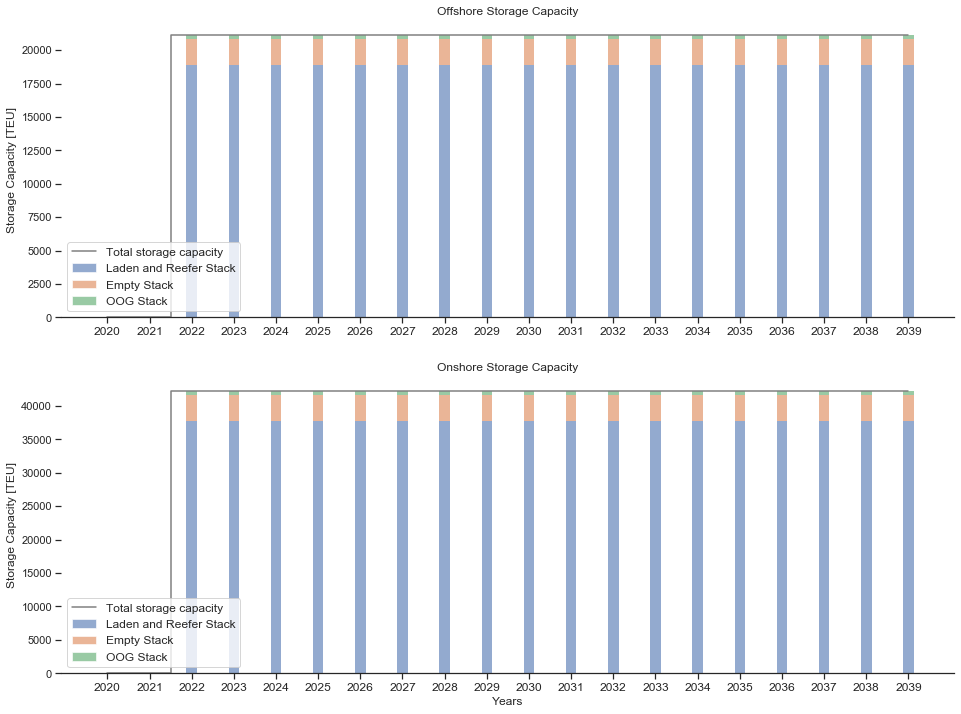

In [13]:
OffshoreBarge.storage_capacity_plot(True)
sns.despine(left=True)

In [14]:
if lifecycle == 20 and scenario_demand == demand_0:
    if demand == 1000000:
        if offshore_distance == 40:  
            if design_container_ship == 12500:
                PV_alt2_40_12500_1000000_storage = PV
                %store PV_alt2_40_12500_1000000_storage

Stored 'PV_alt2_40_12500_1000000_storage' (float64)
